# [One-class Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) with the [LATAM-DDoS-IoT dataset](https://ieee-dataport.org/documents/latam-ddos-iot-dataset)

> Small version with 5% of the original data

# Data preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('balanced_global_dataset_ddos.csv')
df

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
0,22:47:00.737089,1,144,22:47:00.737089,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.000000,0,0
1,22:47:00.738627,3,354,22:47:00.758563,2,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.000000,0,0
2,22:47:00.741855,2,248,22:47:00.741855,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.000000,0,0
3,22:47:00.741898,2,248,22:47:00.741899,4,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
4,22:47:00.742268,2,248,22:47:00.742269,5,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431448,14:40:14.599334,2,248,14:40:14.599335,13456,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,1,3
2431449,14:40:14.696045,24,2416,14:40:14.700509,4366,0.004464,0.004464,0.0,0.004464,0.004464,0.004464,14,10,1260,1156,5152.329590,2912.186279,2016.129028,1,3
2431450,14:40:14.699737,4,264,14:40:14.699905,3345,0.000168,0.000168,0.0,0.000168,0.000168,0.000168,2,2,132,132,17857.142578,5952.380859,5952.380859,1,3
2431451,14:40:14.699738,4,264,14:40:14.699906,5672,0.000168,0.000168,0.0,0.000168,0.000168,0.000168,2,2,132,132,17857.142578,5952.380859,5952.380859,1,3


In [3]:
df.Category.value_counts()

1    1632266
0     799187
Name: Category, dtype: int64

In [4]:
normal_traffic = df[df.Category == 0]
normal_traffic

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
0,22:47:00.737089,1,144,22:47:00.737089,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.000000,0,0
1,22:47:00.738627,3,354,22:47:00.758563,2,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.000000,0,0
2,22:47:00.741855,2,248,22:47:00.741855,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.000000,0,0
3,22:47:00.741898,2,248,22:47:00.741899,4,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
4,22:47:00.742268,2,248,22:47:00.742269,5,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799182,23:37:38.025699,4,264,23:37:38.025853,3426,0.000154,0.000154,0.0,0.000154,0.000154,0.000154,2,2,132,132,19480.519531,6493.506836,6493.506836,0,0
799183,23:37:38.034664,1,80,23:37:38.034664,441146,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,80,0,0.000000,0.000000,0.000000,0,0
799184,23:37:38.034665,1,80,23:37:38.034665,441147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,80,0,0.000000,0.000000,0.000000,0,0
799185,23:37:38.036683,1,70,23:37:38.036683,441148,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,70,0,0.000000,0.000000,0.000000,0,0


In [5]:
attack_udp = df[df.Subcategory == 1]
attack_udp

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
799187,11:39:59.013649,31,4402,11:40:03.791317,1,4.777668,4.777668,0.0,4.777668,4.777668,4.777668,31,0,4402,0,6.279214,6.279214,0.0,1,1
799188,11:39:59.013651,32,4544,11:40:03.791317,2,4.777666,4.777666,0.0,4.777666,4.777666,4.777666,32,0,4544,0,6.488524,6.488524,0.0,1,1
799189,11:39:59.013653,31,4402,11:40:03.791318,3,4.777665,4.777665,0.0,4.777665,4.777665,4.777665,31,0,4402,0,6.279218,6.279218,0.0,1,1
799190,11:39:59.013671,32,4544,11:40:03.791318,4,4.777647,4.777647,0.0,4.777647,4.777647,4.777647,32,0,4544,0,6.488550,6.488550,0.0,1,1
799191,11:39:59.013672,30,4260,11:40:03.791323,5,4.777651,4.777651,0.0,4.777651,4.777651,4.777651,30,0,4260,0,6.069929,6.069929,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,11:40:30.178677,30,4260,11:40:35.154489,15912,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598370,11:40:30.178678,28,3976,11:40:35.154500,15913,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0,1,1
1598371,11:40:30.178682,30,4260,11:40:35.154494,15915,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598372,11:40:30.178682,29,4118,11:40:35.154507,15914,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0,1,1


In [6]:
import math

small_percent_normal_traffic = math.ceil(5 * normal_traffic.shape[0] / 100)
small_percent_normal_traffic

39960

In [7]:
normal_traffic = normal_traffic[:small_percent_normal_traffic]
normal_traffic

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
0,22:47:00.737089,1,144,22:47:00.737089,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.000000,0,0
1,22:47:00.738627,3,354,22:47:00.758563,2,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.000000,0,0
2,22:47:00.741855,2,248,22:47:00.741855,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.000000,0,0
3,22:47:00.741898,2,248,22:47:00.741899,4,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
4,22:47:00.742268,2,248,22:47:00.742269,5,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39955,22:49:36.024233,12,2124,22:49:40.024763,997,4.000530,4.000530,0.0,4.000530,4.000530,4.000530,8,4,1072,1052,2.749636,1.749768,0.749901,0,0
39956,22:49:36.024349,44,9438,22:49:36.033846,22712,0.009497,0.009497,0.0,0.009497,0.009497,0.009497,24,20,4872,4566,4527.745605,2421.817383,2000.631836,0,0
39957,22:49:36.028269,12,2124,22:49:40.028798,999,4.000529,4.000529,0.0,4.000529,4.000529,4.000529,8,4,1072,1052,2.749636,1.749769,0.749901,0,0
39958,22:49:36.028382,44,9438,22:49:36.042077,22713,0.013695,0.013695,0.0,0.013695,0.013695,0.013695,24,20,4872,4566,3139.832031,1679.445068,1387.367676,0,0


In [8]:
outlier_percentage_normal_traffic = math.ceil(5 * normal_traffic.shape[0] / 100)
outlier_percentage_normal_traffic

1998

In [9]:
portion_attack_udp = attack_udp[-outlier_percentage_normal_traffic:]
portion_attack_udp

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
1596376,11:40:30.168343,32,4544,11:40:35.144496,13720,4.976153,4.976153,0.0,4.976153,4.976153,4.976153,32,0,4544,0,6.229712,6.229712,0.0,1,1
1596377,11:40:30.168374,32,4544,11:40:35.144497,13721,4.976123,4.976123,0.0,4.976123,4.976123,4.976123,32,0,4544,0,6.229750,6.229750,0.0,1,1
1596378,11:40:30.168374,32,4544,11:40:35.144504,13722,4.976130,4.976130,0.0,4.976130,4.976130,4.976130,32,0,4544,0,6.229741,6.229741,0.0,1,1
1596379,11:40:30.168374,31,4402,11:40:35.144504,13723,4.976130,4.976130,0.0,4.976130,4.976130,4.976130,31,0,4402,0,6.028781,6.028781,0.0,1,1
1596380,11:40:30.168375,32,4544,11:40:35.144505,13724,4.976130,4.976130,0.0,4.976130,4.976130,4.976130,32,0,4544,0,6.229741,6.229741,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,11:40:30.178677,30,4260,11:40:35.154489,15912,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598370,11:40:30.178678,28,3976,11:40:35.154500,15913,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0,1,1
1598371,11:40:30.178682,30,4260,11:40:35.154494,15915,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598372,11:40:30.178682,29,4118,11:40:35.154507,15914,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0,1,1


In [10]:
dataset = pd.concat([normal_traffic, portion_attack_udp])
dataset

,StartTime,TotPkts,TotBytes,LastTime,Seq,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
0,22:47:00.737089,1,144,22:47:00.737089,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.0,0,0
1,22:47:00.738627,3,354,22:47:00.758563,2,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.0,0,0
2,22:47:00.741855,2,248,22:47:00.741855,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.0,0,0
3,22:47:00.741898,2,248,22:47:00.741899,4,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0,0
4,22:47:00.742268,2,248,22:47:00.742269,5,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,11:40:30.178677,30,4260,11:40:35.154489,15912,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598370,11:40:30.178678,28,3976,11:40:35.154500,15913,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0,1,1
1598371,11:40:30.178682,30,4260,11:40:35.154494,15915,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598372,11:40:30.178682,29,4118,11:40:35.154507,15914,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0,1,1


In [11]:
print('Total number of rows correspond:', normal_traffic.shape[0] + portion_attack_udp.shape[0] == dataset.shape[0])

Total number of rows correspond: True


In [12]:
dataset.Category.value_counts(normalize=True)

0    0.952381
1    0.047619
Name: Category, dtype: float64

## So far we have normal traffic and outliers (almost 5% of the created dataset). Now we can apply [Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection).

In [13]:
dataset.columns

Index(['StartTime', 'TotPkts', 'TotBytes', 'LastTime', 'Seq', 'Dur', 'Mean',
       'StdDev', 'Sum', 'Min', 'Max', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'DstBytes', 'Rate', 'SrcRate', 'DstRate', 'Category', 'Subcategory'],
      dtype='object')

In [14]:
dataset.drop(['StartTime', 'LastTime', 'Seq'], axis=1, inplace=True)
dataset

,TotPkts,TotBytes,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category,Subcategory
0,1,144,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.0,0,0
1,3,354,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.0,0,0
2,2,248,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.0,0,0
3,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0,0
4,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598370,28,3976,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0,1,1
1598371,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1,1
1598372,29,4118,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0,1,1


In [15]:
dataset.Category.value_counts()

0    39960
1     1998
Name: Category, dtype: int64

In [16]:
dataset.Subcategory.value_counts()

0    39960
1     1998
Name: Subcategory, dtype: int64

In [17]:
dataset.drop(['Subcategory'], axis=1, inplace=True)
dataset

,TotPkts,TotBytes,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category
0,1,144,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.0,0
1,3,354,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.0,0
2,2,248,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.0,0
3,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0
4,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1
1598370,28,3976,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0,1
1598371,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0,1
1598372,29,4118,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0,1


In [18]:
"""
    - Negative class (-1): Normal traffic
    - Positive class (1): Attacks
"""

dataset.loc[dataset['Category'] == 0, 'Category'] = -1
dataset.Category.value_counts()

-1    39960
 1     1998
Name: Category, dtype: int64

# ML model training

## 1. Without data preprocessing

In [19]:
dataset.describe()

,TotPkts,TotBytes,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate,Category
count,41958.000000,41958.000000,41958.000000,41958.000000,41958.0,41958.000000,41958.000000,41958.000000,41958.000000,41958.000000,41958.000000,41958.000000,4.195800e+04,4.195800e+04,4.195800e+04,41958.000000
mean,12.397898,2179.651318,0.856229,0.856229,0.0,0.856229,0.856229,0.856229,7.188736,5.209162,1483.970542,695.680776,1.475373e+05,8.748355e+04,2.991534e+04,-0.904762
std,44.248095,9627.165368,1.644543,1.644543,0.0,1.644543,1.644543,1.644543,22.674744,22.192841,6570.334385,5519.466182,4.946795e+05,2.579440e+05,1.522434e+05,0.425923
min,1.000000,60.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,2.000000,235.000000,0.000251,0.000251,0.0,0.000251,0.000251,0.000251,1.000000,1.000000,81.000000,132.000000,1.411119e+01,0.000000e+00,0.000000e+00,-1.000000
50%,4.000000,264.000000,0.059939,0.059939,0.0,0.059939,0.059939,0.059939,2.000000,1.000000,132.000000,155.000000,1.806228e+01,1.748937e+00,0.000000e+00,-1.000000
75%,8.000000,528.000000,0.279938,0.279938,0.0,0.279938,0.279938,0.279938,4.000000,2.000000,264.000000,224.000000,1.162791e+04,4.424779e+03,2.388400e+02,-1.000000
max,908.000000,802346.000000,4.999999,4.999999,0.0,4.999999,4.999999,4.999999,454.000000,518.000000,243576.000000,790178.000000,3.000000e+06,1.500000e+06,1.666667e+06,1.000000


In [20]:
import sklearn

sklearn.__version__

'0.24.2'

In [21]:
X = dataset.drop(['Category'], axis=1)
X

,TotPkts,TotBytes,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate
0,1,144,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,0,144,0,0.000000,0.000000,0.0
1,3,354,0.019936,0.019936,0.0,0.019936,0.019936,0.019936,2,1,132,222,100.321022,50.160511,0.0
2,2,248,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,0,248,0,0.000000,0.000000,0.0
3,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0
4,2,248,0.000001,0.000001,0.0,0.000001,0.000001,0.000001,2,0,248,0,1000000.000000,1000000.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598369,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0
1598370,28,3976,4.975822,4.975822,0.0,4.975822,4.975822,4.975822,28,0,3976,0,5.426239,5.426239,0.0
1598371,30,4260,4.975812,4.975812,0.0,4.975812,4.975812,4.975812,30,0,4260,0,5.828195,5.828195,0.0
1598372,29,4118,4.975825,4.975825,0.0,4.975825,4.975825,4.975825,29,0,4118,0,5.627208,5.627208,0.0


In [22]:
y = dataset['Category']
y

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
1598369    1
1598370    1
1598371    1
1598372    1
1598373    1
Name: Category, Length: 41958, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

In [24]:
import numpy as np

np.unique(y_train)

array([-1,  1])

In [25]:
np.unique(y_val)

array([-1,  1])

In [26]:
np.unique(y_test)

array([-1,  1])

In [27]:
X_train

,TotPkts,TotBytes,Dur,Mean,StdDev,Sum,Min,Max,SrcPkts,DstPkts,SrcBytes,DstBytes,Rate,SrcRate,DstRate
9459,32,3158,2.904643,2.904643,0.0,2.904643,2.904643,2.904643,14,18,1508,1650,10.672567,4.475593,5.852698
25243,24,4342,0.044106,0.044106,0.0,0.044106,0.044106,0.044106,14,10,1220,3122,521.471008,294.744476,204.053879
6596,8,528,3.068297,3.068297,0.0,3.068297,3.068297,3.068297,4,4,264,264,2.281396,0.977741,0.977741
39913,2,237,0.064390,0.064390,0.0,0.064390,0.064390,0.064390,1,1,81,156,15.530361,0.000000,0.000000
19321,4,264,0.000044,0.000044,0.0,0.000044,0.000044,0.000044,2,2,132,132,68181.820312,22727.273438,22727.273438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8,528,1.027514,1.027514,0.0,1.027514,1.027514,1.027514,4,4,264,264,6.812560,2.919668,2.919668
11284,4,264,0.000230,0.000230,0.0,0.000230,0.000230,0.000230,2,2,132,132,13043.477539,4347.826172,4347.826172
38158,8,528,3.073582,3.073582,0.0,3.073582,3.073582,3.073582,4,4,264,264,2.277473,0.976060,0.976060
860,24,2414,0.002031,0.002031,0.0,0.002031,0.002031,0.002031,14,10,1256,1158,11324.469727,6400.787598,4431.314453


In [28]:
print('Training set number of rows:', X_train.shape[0])
print('Validation set number of rows:', X_val.shape[0])
print('Testing set number of rows:', X_test.shape[0])

Training set number of rows: 33566
Validation set number of rows: 6713
Testing set number of rows: 1679


In [29]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels_auc = {}
nu = 0.05 # percentage of anomalies in the dataset
pos_label = 1 # label of the minority class

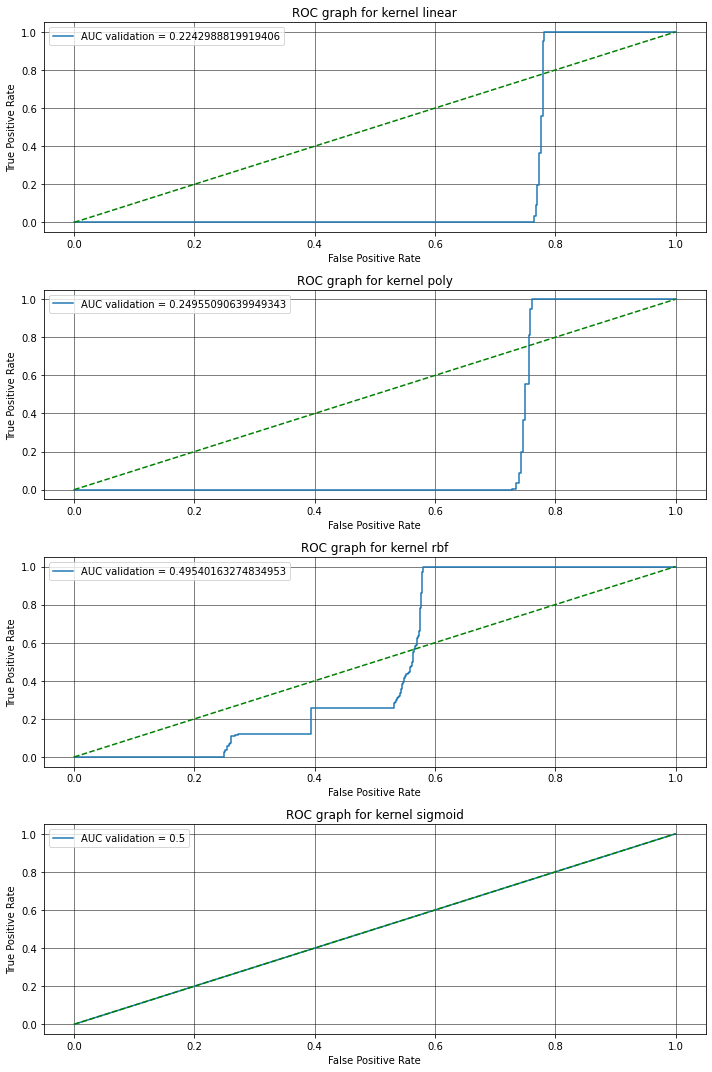

In [30]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, kernel in enumerate(kernels):
    clf = OneClassSVM(kernel=kernel, nu=nu, gamma='auto').fit(X_train)

    y_pred_scores = (-1.0) * clf.decision_function(X_val)
    auc = roc_auc_score(y_val, y_pred_scores)
    
    kernels_auc[kernel] = auc
    
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores, pos_label=pos_label)
    
    axs[i].plot(fpr, tpr, label=f'AUC validation = {auc}')
    axs[i].plot([0,1], [0,1], 'g--')
    axs[i].legend()
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC graph for kernel {kernel}')
    axs[i].grid(color='black', linestyle='-', linewidth=0.5)

fig.tight_layout()
plt.show()

## 2. Min-Max Scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [32]:
X_train_mm = min_max_scaler.fit_transform(X_train)
X_val_mm = min_max_scaler.transform(X_val)
X_test_mm = min_max_scaler.transform(X_test)

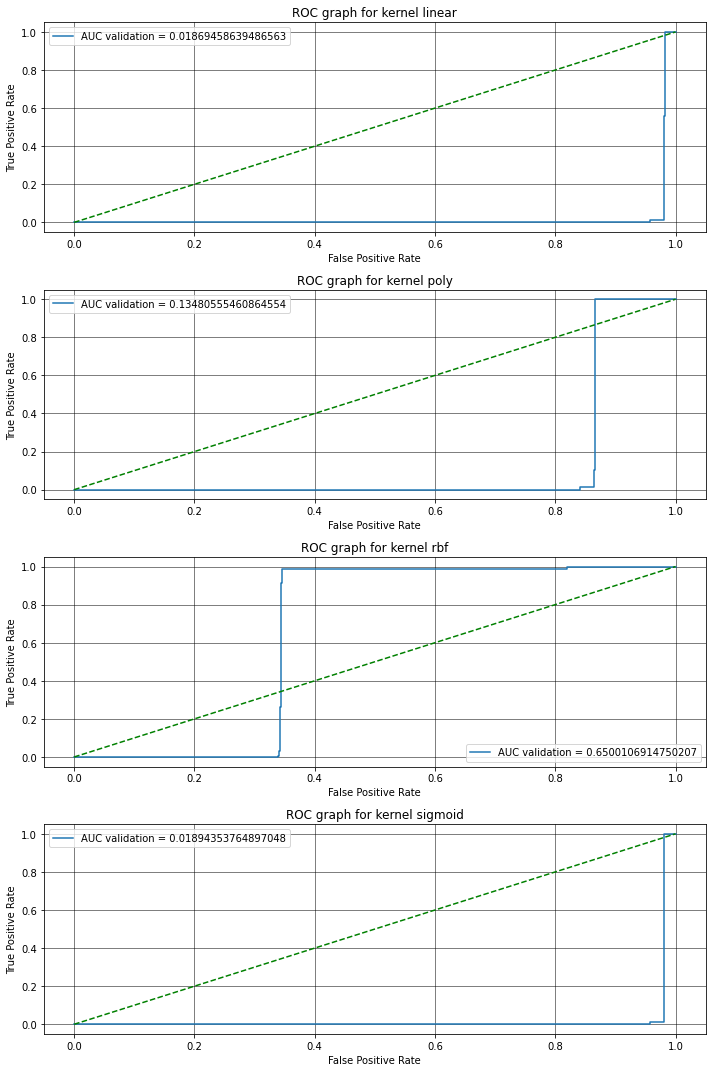

In [33]:
kernels_mm_auc = {}

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, kernel in enumerate(kernels):
    clf = OneClassSVM(kernel=kernel, nu=nu, gamma='auto').fit(X_train_mm)

    y_pred_scores = (-1.0) * clf.decision_function(X_val_mm)
    auc = roc_auc_score(y_val, y_pred_scores)
    
    kernels_mm_auc[kernel] = auc
    
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores, pos_label=pos_label)
    
    axs[i].plot(fpr, tpr, label=f'AUC validation = {auc}')
    axs[i].plot([0,1], [0,1], 'g--')
    axs[i].legend()
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC graph for kernel {kernel}')
    axs[i].grid(color='black', linestyle='-', linewidth=0.5)

fig.tight_layout()
plt.show()

## 3. Standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [35]:
X_train_ss = std_scaler.fit_transform(X_train)
X_val_ss = std_scaler.transform(X_val)
X_test_ss = std_scaler.transform(X_test)

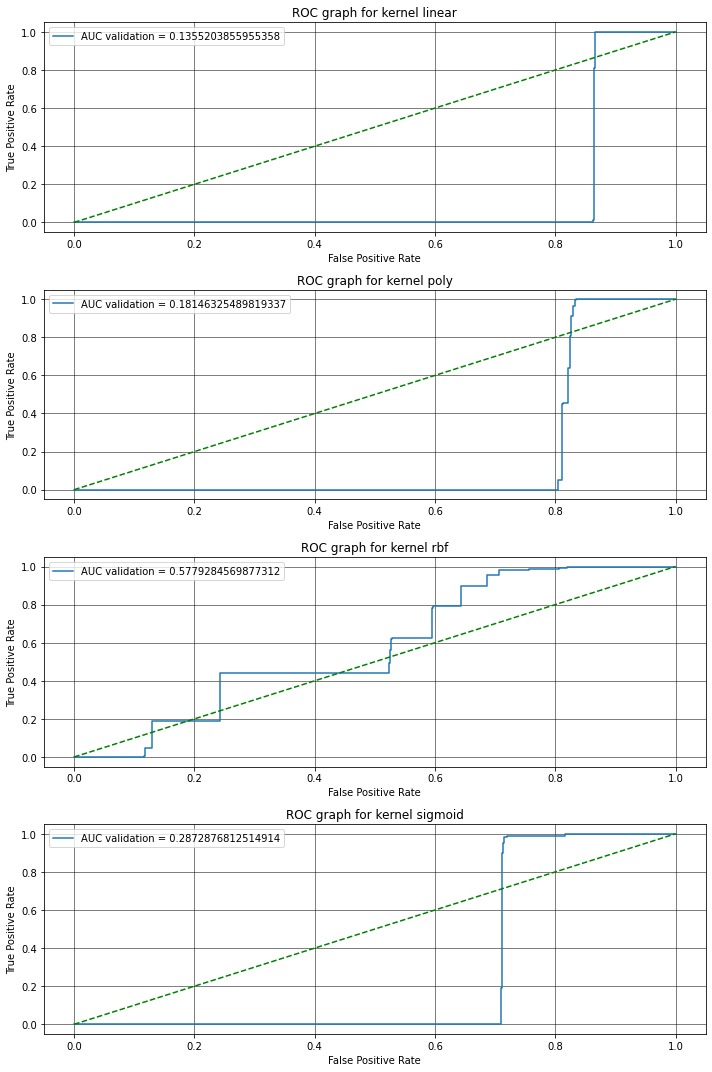

In [36]:
kernels_ss_auc = {}

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, kernel in enumerate(kernels):
    clf = OneClassSVM(kernel=kernel, nu=nu, gamma='auto').fit(X_train_ss)

    y_pred_scores = (-1.0) * clf.decision_function(X_val_ss)
    auc = roc_auc_score(y_val, y_pred_scores)
    
    kernels_ss_auc[kernel] = auc
    
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores, pos_label=pos_label)
    
    axs[i].plot(fpr, tpr, label=f'AUC validation = {auc}')
    axs[i].plot([0,1], [0,1], 'g--')
    axs[i].legend()
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC graph for kernel {kernel}')
    axs[i].grid(color='black', linestyle='-', linewidth=0.5)

fig.tight_layout()
plt.show()

## Benchmark of data preprocessing techniques

In [37]:
kernels_auc

{'linear': 0.2242988819919406,
 'poly': 0.24955090639949343,
 'rbf': 0.49540163274834953,
 'sigmoid': 0.5}

In [38]:
kernels_mm_auc

{'linear': 0.01869458639486563,
 'poly': 0.13480555460864554,
 'rbf': 0.6500106914750207,
 'sigmoid': 0.01894353764897048}

In [39]:
kernels_ss_auc

{'linear': 0.1355203855955358,
 'poly': 0.18146325489819337,
 'rbf': 0.5779284569877312,
 'sigmoid': 0.2872876812514914}

In [40]:
kernels

['linear', 'poly', 'rbf', 'sigmoid']

In [41]:
benchmark_data = {
    'Without preprocessing': [value for key, value in kernels_auc.items()],
    'Min Max Scaler': [value for key, value in kernels_mm_auc.items()],
    'Standard Scaler': [value for key, value in kernels_ss_auc.items()],
}

benchmark = pd.DataFrame(benchmark_data, index=kernels)
benchmark

,Without preprocessing,Min Max Scaler,Standard Scaler
linear,0.224299,0.018695,0.135520
poly,0.249551,0.134806,0.181463
rbf,0.495402,0.650011,0.577928
sigmoid,0.500000,0.018944,0.287288


> rbf with Min Max Scaler is the best configuration for our OSVM with this data.

# Final result (using the testing set)

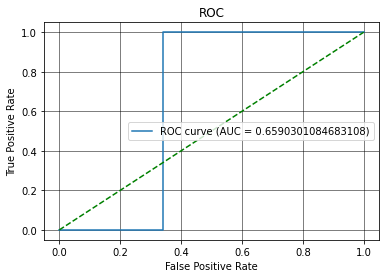

In [42]:
clf = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto').fit(X_train_mm)

y_pred_scores = (-1.0) * clf.decision_function(X_test_mm)
auc = roc_auc_score(y_test, y_pred_scores)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores, pos_label=1)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc})')
plt.plot([0,1], [0,1], 'g--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.grid(color='black', linestyle='-', linewidth=0.5)

In [43]:
auc

0.6590301084683108

In [44]:
fpr

array([0.00000000e+00, 6.24219725e-04, 8.11485643e-03, 2.68414482e-02,
       3.87016230e-02, 4.05742821e-02, 4.24469413e-02, 5.11860175e-02,
       5.18102372e-02, 5.55555556e-02, 6.67915106e-02, 6.80399501e-02,
       6.92883895e-02, 7.11610487e-02, 9.55056180e-02, 9.67540574e-02,
       1.04868914e-01, 1.07990012e-01, 1.08614232e-01, 1.09862672e-01,
       1.15480649e-01, 1.17977528e-01, 1.22971286e-01, 1.24219725e-01,
       1.24843945e-01, 1.26092385e-01, 1.29837703e-01, 1.32334582e-01,
       1.39200999e-01, 1.40449438e-01, 1.42946317e-01, 1.44194757e-01,
       1.50436954e-01, 1.52309613e-01, 1.60424469e-01, 1.62297129e-01,
       1.66042447e-01, 1.67290886e-01, 1.71660424e-01, 1.72908864e-01,
       1.74157303e-01, 1.75405743e-01, 1.76654182e-01, 1.77902622e-01,
       1.78526841e-01, 1.79775281e-01, 1.84144819e-01, 1.85393258e-01,
       1.92259675e-01, 1.93508115e-01, 1.96004994e-01, 1.97253433e-01,
       1.99126092e-01, 2.00374532e-01, 2.05368290e-01, 2.06616729e-01,
      

In [45]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     